# Titanic: Machine Learning from Disaster (Feature Study and Data Cleaning)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading the data
train = pd.read_csv('data/train.csv')
train_size = len(train)
test = pd.read_csv('data/test.csv')

# joining the train and test data for better feature analysis
data = pd.concat( [train, test], axis = 0 ).reset_index(drop = True)
data.fillna(np.nan, inplace = True)

In [3]:
original_features = list(train.columns)
print(original_features)
train.head()

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**PassengerId:** Integer showing id of the passengers  
**Survived:** Target feature. 1 if the passenger survived and 0 otherwise  
**Pclass:** Ticket class (1, 2 or 3).  
**Name:** Passenger name  
**Sex:** male/female  
**Age:** Passeneger age in years  
**SibSp:** No. of siblings/spouses aboard the ship  
**Parch:** No. of parents/childeren aboard the ship  
**Ticket:** Ticket number  
**Fare:** Passenger fare  
**Cabin:**  Passenger cabin number  
**Embarked:** Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)  


In [4]:
data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# recognizing the features with missing values
cols_with_miss = [col for col in data.columns if data[col].isnull().any()]
print('Columns with missing values:',cols_with_miss)
print('\nnumber of missing values in each colum:' )
print(data.isnull().sum())

Columns with missing values: ['Survived', 'Age', 'Fare', 'Cabin', 'Embarked']

number of missing values in each colum:
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


The missing values in column 'Survived' are because of the fact that the training and the test data was combined for better feature study. Actually, 'Survived' is the target feature which is required to be predicted in the test data.

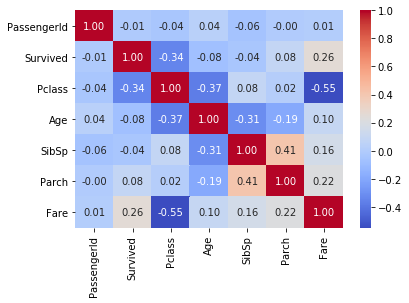

In [6]:
# checking correlation
sns.heatmap( train[original_features].corr(), cmap = 'coolwarm', 
             fmt = '.2f', annot = True )

# 1. Understanding the Categorical Features

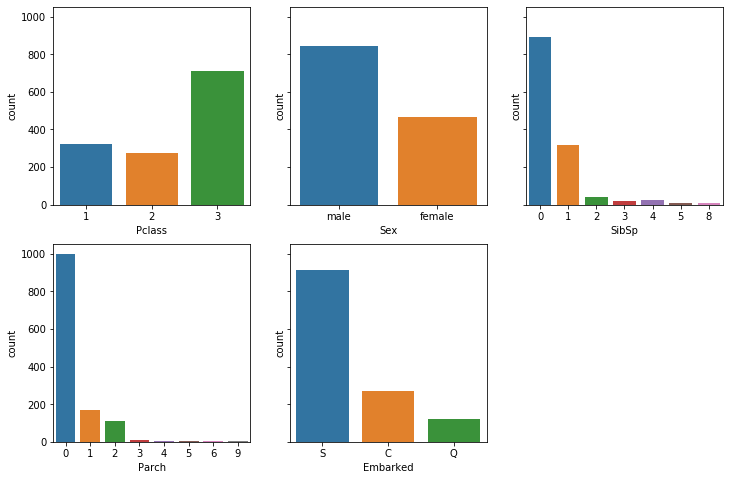

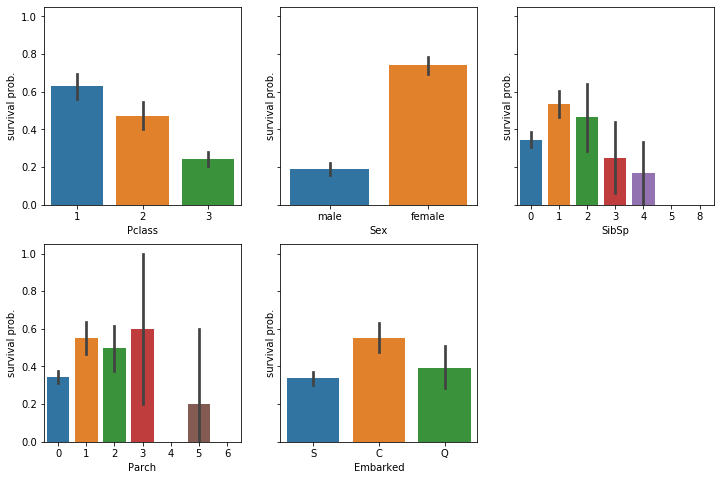

In [7]:
# understanding the categorical features
selected_cat_feat = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

#making count plots to understand the categorical features
location = [(0,0), (0,1), (0,2), (1,0), (1,1)]
f1, axes1 = plt.subplots(2, 3, figsize=(12, 8), sharey = True)
f1.delaxes(axes1[1,2])

f2, axes2 = plt.subplots(2, 3, figsize=(12, 8), sharey = True)
f2.delaxes(axes2[1,2])

for i in range(len(location)):
    feat = selected_cat_feat[i]
    plt.figure(f1.number)
    sns.countplot(data[feat], ax = axes1[location[i]])
    plt.figure(f2.number)
    g = sns.barplot(x = train[feat], y = train['Survived'], ax = axes2[location[i]])
    g.set_ylabel("survival prob.")

### 1.1. Observations from the Count plots
These plots show the unique values in the selected categorical features and their frequency in the data.
### 1.2. Observations from the Bar plots (survival probability)
* Class 1 passenger have the highest survival probability. Similarly, class 2 passengers are more likely to survive as compared to class 3. This might be because of the prioty given to class 1 passengers during rescue. 
* Females are more likely to survive (priority during rescue).
* Passengers with smaller families are more likely to survive. This might be due to the fact that it is easier to take out the smaller families during rescue (see the plot for 'SibSp' and also for 'Parch')
* Passengers who embarked from Cherbourg are more likely to survive.


# 2. Understanding the Continuous Features 'Age' and 'Fare'

Swarm plots



D:\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
D:\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


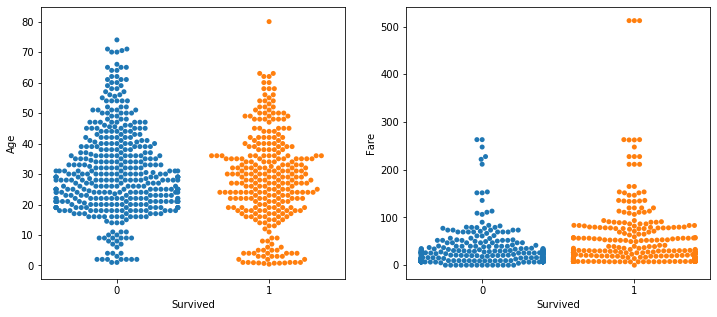

In [8]:
# understanding the continuous features 'Age' and 'Fare'
f3, axes3 = plt.subplots(1,2, figsize = (12,5))

# Swarm plots
print("Swarm plots\n")
plt.figure(f3.number)
sns.swarmplot(train.Survived, train.Age, ax = axes3[0])
sns.swarmplot(train.Survived, train.Fare, ax = axes3[1])


Distribution plots



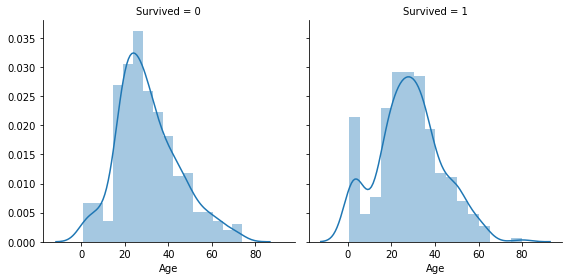

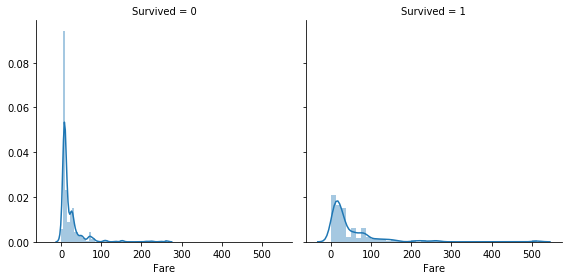

In [9]:
print("Distribution plots\n")
# distribution plots
g1 = sns.FacetGrid(train, col = "Survived" , height = 4, aspect = 1)
g1 = g1.map(sns.distplot, 'Age')

g2 = sns.FacetGrid(train, col = "Survived" , height = 4, aspect = 1)
g2 = g2.map(sns.distplot, 'Fare')

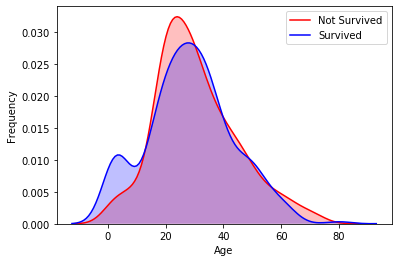

In [10]:
# Explore Age distibution 
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], 
                color="Red", shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], 
                 color="Blue", shade= True, ax = g)
g.set(ylabel = "Frequency", xlabel = "Age")
g.legend(["Not Survived","Survived"])

(-10, 300)

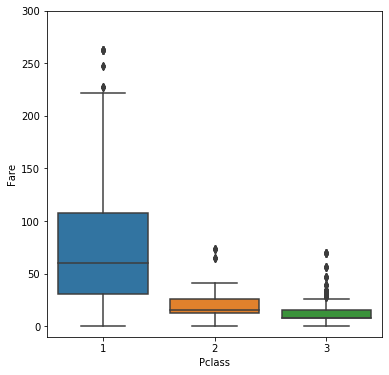

In [11]:
# explore Fare vs Pclass
plt.figure(figsize = (6,6))
sns.boxplot(x = 'Pclass', y = 'Fare', data = data)
plt.ylim([-10,300])

### 2.1. Observations from the Above Plots
* Passengers with younger age were comparitively more likely to survive (higher priority while rescue operation).
* Passengers who paid more fare, were more likely to survive. This might be because of the fact that they were given priority while rescue operation because they belonged to a better class cabin.
* The final box plot shows that the passengers in better class cabins paid more fare, which makes sense.

# 3. Handling the Missing Values

### 3.1. Handling missing values in 'Fare' and 'Embarked'

In [12]:
# as shown previously, 'Fare has only one missing value, so fill it with the mean value
data.Fare.fillna(data['Fare'].median(), inplace = True)

# 'Embarked' has only two missing values. It would be fine to replace these two 
# with the ports from which most of the passengers embarked. See the count plot above
# for 'Embarked'. Most frequent category is 'S'
data.Embarked.fillna('S', inplace = True)


### 3.2. Handling missing values in 'Age'

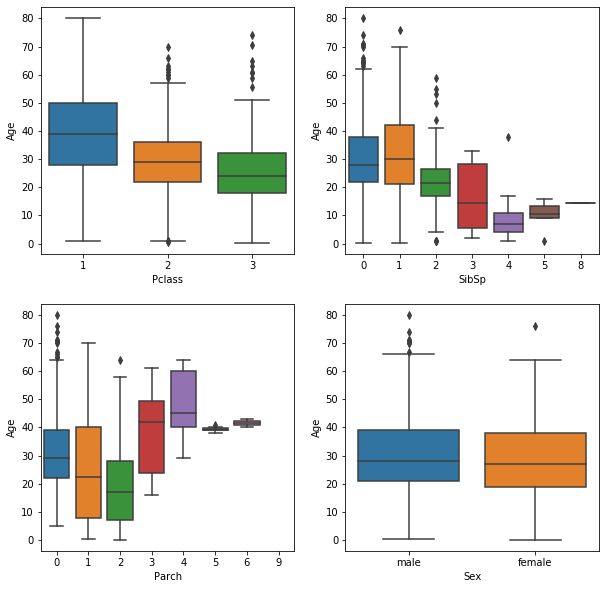

In [13]:
# Age has 263 missing values. It is appropriate to find these missing values by using the other
# categorical features. For example, it is possible that age depends on features like 'Pclass', 'SibSp', 'Parch', 'Sex'
f4, axes4 = plt.subplots(2,2, figsize= (10,10))    
Age_vs_cat = ['Pclass', 'SibSp', 'Parch', 'Sex']
locations4 = [(0,0), (0,1), (1,0), (1,1)]
for i in range (len(Age_vs_cat)):
    sns.boxplot(x = Age_vs_cat[i], y = 'Age', data = data, 
                ax = axes4[locations4[i]])

#### 3.2.1. Observations from the above plots
* Age is not depending much on the 'Sex'. 
* 'Pclass' of 1 has higher mean age values then Pclass of 2 and Pclass of 2 has higher Age as compared to Pcalss of 3.
* Passengers with more family members tend to have higher Age.  

So, fill the missing values in 'Age' depending upon the corresponding categories of the variables 'Pclass', 'Parch' and 'SibSp'


In [14]:
Age_nan_indices = list(data['Age'][data['Age'].isnull()].index)
for i in Age_nan_indices:
    pred_Age = data['Age'][ ((data['Pclass'] == data.loc[i]['Pclass']) 
                                    & (data['SibSp'] == data.loc[i]['SibSp'])
                                    & (data['Parch'] == data.loc[i]['Parch']))].median()
    if  not np.isnan(pred_Age):
        data['Age'].loc[i] = pred_Age
    else:
        data['Age'].loc[i] = data['Age'][ (data['SibSp'] == data['SibSp'].loc[i])].mean() 

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### 3.3. Handling missing values in 'Cabin'

Cabin has total 1014 missiing values. These passengers might not have any Cabin. So, they can be assigned a cabin 'X'

In [15]:
data.Cabin.fillna('X', inplace = True)

# 4. Feature Engineering

### 4.1. Handling the 'Name' Feature

The names of the passengers contain some titles and it is possible that people with particular titles were given priority during rescue. So, it would be good to make a new feature containing the titles of the passengers

In [16]:
data.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [17]:
names = [naam.split(',')[1].split('.')[0].strip() for naam in list(data.Name)]

data.drop("Name", axis = 1, inplace = True)
data["Title"] = names


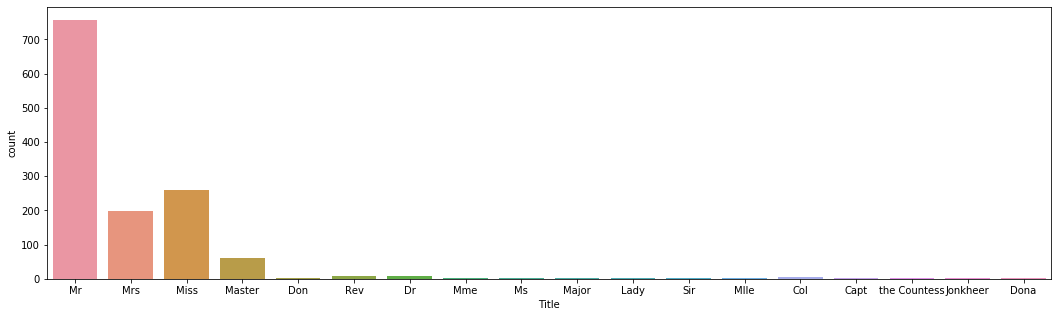

In [18]:
# Make the count plot to observe the categories of different titles
plt.figure(figsize=(18,5))
sns.countplot(data.Title)

The titles of Mr, Mrs, Miss and Master are the most frequent. The rest of the titles can be combined in a new category 'Rare'.

In [19]:
# Convert to categorical values Title 
data["Title"] = data["Title"].replace(['Lady', 'the Countess','Countess', "Mlle",
                                              'Capt', 'Col','Don', 'Dr', 'Major', 
                                              'Rev', 'Sir', 'Jonkheer', 'Dona',
                                              "Ms", "Mme"], 'Rare')


[Text(0, 0.5, 'Survival prob.')]

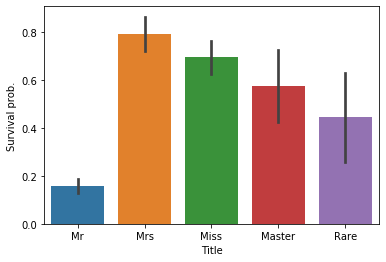

In [20]:
# understanding the survival of different Titles:
g = sns.barplot(x = 'Title', y = 'Survived', data = data)
g.set(ylabel = 'Survival prob.')

So, it is quite obvious that the survival is depending upon the titles of the passengers

In [21]:
# label encoding the Title categories

data["Title"] = data["Title"].map({"Master":0, "Miss":1, 
                                          "Mrs":2, "Mr":3, "Rare":4})
data["Title"] = data["Title"].astype(int)

### 4.2. Handling the 'Cabin' Feature

In [22]:
data.Cabin.head()

0       X
1     C85
2       X
3    C123
4       X
Name: Cabin, dtype: object

The first alphabet in the cabin names is the representative of different types of cabins. So, just take this alphabet as the cabin value.

In [23]:
cabins = [cab[0] for cab in list(data.Cabin)]
data.Cabin = cabins

# converting the Cabin feature into One Hot Encoding

data = pd.get_dummies(data, columns = ['Cabin'], prefix = 'Cab_')

### 4.3. Handling the 'Sex' Feature

The lable encoding for 'male' and 'female' would be a good starting point.

In [24]:
data.Sex = data.Sex.map({'male':0, 'female':1})

### 4.4. Handling the 'Embarked' Feature

Get the one hot encoding for this feature.

In [25]:
data = pd.get_dummies(data, columns = ['Embarked'], prefix = 'Em_')

At this point, the data-preprocessing is almost done.

In [26]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title,...,Cab__C,Cab__D,Cab__E,Cab__F,Cab__G,Cab__T,Cab__X,Em__C,Em__Q,Em__S
0,1,0.0,3,0,22.0,1,0,A/5 21171,7.2500,3,...,0,0,0,0,0,0,1,0,0,1
1,2,1.0,1,1,38.0,1,0,PC 17599,71.2833,2,...,1,0,0,0,0,0,0,1,0,0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,1,...,0,0,0,0,0,0,1,0,0,1
3,4,1.0,1,1,35.0,1,0,113803,53.1000,2,...,1,0,0,0,0,0,0,0,0,1
4,5,0.0,3,0,35.0,0,0,373450,8.0500,3,...,0,0,0,0,0,0,1,0,0,1


In [27]:
data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Title            int32
Cab__A           uint8
Cab__B           uint8
Cab__C           uint8
Cab__D           uint8
Cab__E           uint8
Cab__F           uint8
Cab__G           uint8
Cab__T           uint8
Cab__X           uint8
Em__C            uint8
Em__Q            uint8
Em__S            uint8
dtype: object

In [28]:
data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Title            0
Cab__A           0
Cab__B           0
Cab__C           0
Cab__D           0
Cab__E           0
Cab__F           0
Cab__G           0
Cab__T           0
Cab__X           0
Em__C            0
Em__Q            0
Em__S            0
dtype: int64

Moreover, the 'Ticket' feature might not be that important. It just shows the ticket number. There might be some cabin information hidden in the 'Ticket' feature, but we have already a separate feature for that.  
Also, the 'PassengerId' can be dropped.


In [29]:
# drop the 'Ticket' column
data.drop('Ticket', axis = 1, inplace = True)

# drop the PassengerId column
data.drop("PassengerId", axis = 1, inplace = True)

In [30]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Cab__A,Cab__B,Cab__C,Cab__D,Cab__E,Cab__F,Cab__G,Cab__T,Cab__X,Em__C,Em__Q,Em__S
0,0.0,3,0,22.0,1,0,7.2500,3,0,0,0,0,0,0,0,0,1,0,0,1
1,1.0,1,1,38.0,1,0,71.2833,2,0,0,1,0,0,0,0,0,0,1,0,0
2,1.0,3,1,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,1
3,1.0,1,1,35.0,1,0,53.1000,2,0,0,1,0,0,0,0,0,0,0,0,1
4,0.0,3,0,35.0,0,0,8.0500,3,0,0,0,0,0,0,0,0,1,0,0,1


# 5. Train-Test

In [31]:
train = data[:train_size]   
test = data[train_size:]

test.drop('Survived', axis = 1, inplace = True)

train_y = train.Survived
train.drop('Survived', axis = 1, inplace = True)

D:\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Cab__A,Cab__B,Cab__C,Cab__D,Cab__E,Cab__F,Cab__G,Cab__T,Cab__X,Em__C,Em__Q,Em__S
0,3,0,22.0,1,0,7.2500,3,0,0,0,0,0,0,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,2,0,0,1,0,0,0,0,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,2,0,0,1,0,0,0,0,0,0,0,0,1
4,3,0,35.0,0,0,8.0500,3,0,0,0,0,0,0,0,0,1,0,0,1


Now, the data is ready to used for Machine Learning Modelling. K-fold cross validation or train-test split can be used.